In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# OG image

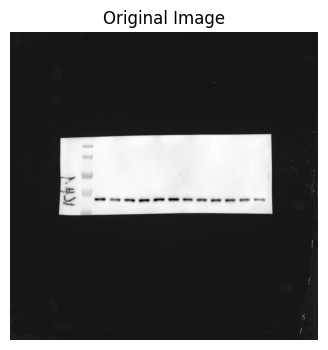

In [2]:
local_image_path = "./1.jpeg"

image_bgr = cv2.imread(local_image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Grayscale image, if it wasn't already

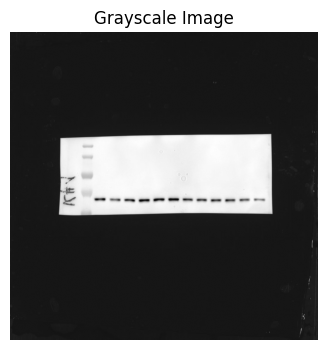

In [3]:

### 4. Convert to Grayscale

# Convert the image to grayscale for thresholding
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Using threshold and ROI for bounding boxes

If the contours are all standardized to appear in the same area of the image, we can define an region of interest (ROI) to detect the contours. 
Thus I defined a ROI where only in this region we look for the contours. To do that I have a threshold where if the grayscale pixel in the image is below 170, it makes it a contour.

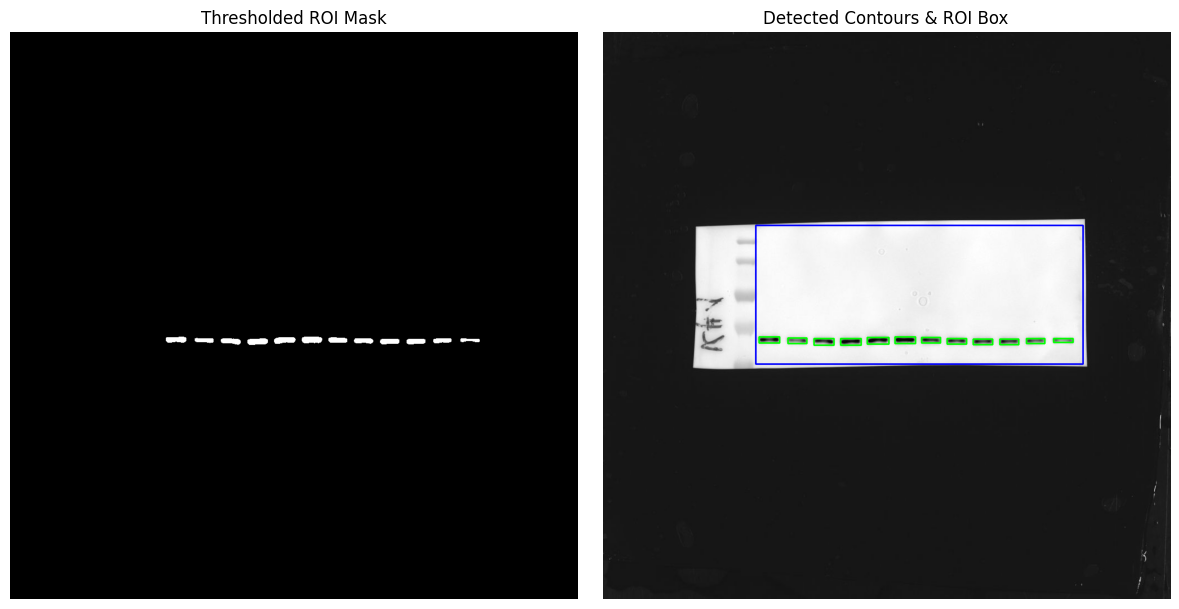

Number of bounding boxes: 12
[(715, 555, 34, 10), (667, 555, 35, 10), (812, 554, 35, 7), (763, 554, 33, 9), (620, 554, 35, 10), (428, 554, 37, 12), (380, 554, 36, 12), (333, 553, 34, 10), (574, 552, 34, 10), (476, 552, 39, 12), (526, 551, 37, 12), (281, 551, 37, 11)]


In [ ]:
# ROI coordinates
x1, y1 = 275, 350
roi_width, roi_height = 590, 250
x2 = x1 + roi_width
y2 = y1 + roi_height

roi = gray[y1:y2, x1:x2]

# threshold
manual_threshold = 170
_, roi_binary = cv2.threshold(roi, manual_threshold, 255, cv2.THRESH_BINARY_INV)

# Insert ROI mask back into a full-size mask
full_mask = np.zeros_like(gray, dtype=np.uint8)
full_mask[y1:y2, x1:x2] = roi_binary

# Find contours on the mask
contours, hierarchy = cv2.findContours(full_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes + the ROI box
image_boxes = image_bgr.copy()

# Draw ROI box
cv2.rectangle(image_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)

# bounding boxes storing and drawing
boxes = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    boxes.append((x, y, w, h))
    cv2.rectangle(image_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize=(12,6))

# first plot
plt.subplot(1, 2, 1)
plt.title("Thresholded ROI Mask")
plt.imshow(full_mask, cmap='gray')
plt.axis("off")

# seconnd plot
plt.subplot(1, 2, 2)
plt.title("Detected Contours & ROI Box")
image_rgb = cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

print("Number of bounding boxes:", len(boxes))
print(boxes)
